## Explanatory Data Analysis

### Loading the cleaned Dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")


In [2]:
flight_eda_df = pd.read_csv("/teamspace/studios/this_studio/Flight_delay_analysis/data/cleaned_flight_data.csv")
flight_eda_df.head(10)

,fl_date,airline,airline_dot,airline_code,dot_code,fl_number,origin,origin_city,dest,dest_city,...,crs_elapsed_time,elapsed_time,air_time,distance,delay_due_carrier,delay_due_weather,delay_due_nas,delay_due_security,delay_due_late_aircraft,target
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,186.0,176.0,153.0,1065.0,0.0,0.0,0.0,0.0,0.0,False
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,235.0,236.0,189.0,1399.0,0.0,0.0,0.0,0.0,0.0,False
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,118.0,112.0,87.0,680.0,0.0,0.0,0.0,0.0,0.0,True
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0,True
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,181.0,182.0,153.0,985.0,0.0,0.0,0.0,0.0,0.0,False
5,2019-07-31,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,665,DAL,"Dallas, TX",OKC,"Oklahoma City, OK",...,60.0,54.0,36.0,181.0,141.0,0.0,0.0,0.0,0.0,True
6,2023-06-11,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2134,DCA,"Washington, DC",BOS,"Boston, MA",...,109.0,89.0,58.0,399.0,0.0,0.0,0.0,0.0,0.0,False
7,2019-07-08,Republic Airline,Republic Airline: YX,YX,20452,4464,HSV,"Huntsville, AL",DCA,"Washington, DC",...,122.0,151.0,88.0,613.0,0.0,0.0,23.0,0.0,0.0,True
8,2023-02-12,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,590,IAH,"Houston, TX",LAX,"Los Angeles, CA",...,227.0,219.0,200.0,1379.0,0.0,0.0,0.0,0.0,0.0,False
9,2020-08-22,Alaska Airlines Inc.,Alaska Airlines Inc.: AS,AS,19930,223,SEA,"Seattle, WA",FAI,"Fairbanks, AK",...,210.0,220.0,198.0,1533.0,0.0,0.0,0.0,0.0,0.0,True


In [3]:
flight_eda_df.sample(10)

,fl_date,airline,airline_dot,airline_code,dot_code,fl_number,origin,origin_city,dest,dest_city,...,crs_elapsed_time,elapsed_time,air_time,distance,delay_due_carrier,delay_due_weather,delay_due_nas,delay_due_security,delay_due_late_aircraft,target
714839,2020-03-01,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2805,BWI,"Baltimore, MD",ATL,"Atlanta, GA",...,120.0,101.0,84.0,577.0,0.0,0.0,0.0,0.0,0.0,False
2360965,2021-08-25,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,2238,SNA,"Santa Ana, CA",OAK,"Oakland, CA",...,85.0,76.0,58.0,371.0,0.0,0.0,0.0,0.0,0.0,False
743890,2020-07-19,Hawaiian Airlines Inc.,Hawaiian Airlines Inc.: HA,HA,19690,277,KOA,"Kona, HI",HNL,"Honolulu, HI",...,46.0,40.0,27.0,163.0,0.0,0.0,0.0,0.0,0.0,False
307363,2019-12-20,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,171,JFK,"New York, NY",LAX,"Los Angeles, CA",...,394.0,379.0,318.0,2475.0,0.0,0.0,0.0,0.0,0.0,True
2640591,2022-03-23,Republic Airline,Republic Airline: YX,YX,20452,3542,IAD,"Washington, DC",ATL,"Atlanta, GA",...,126.0,116.0,95.0,534.0,0.0,0.0,0.0,0.0,182.0,True
1076930,2019-01-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2043,ATL,"Atlanta, GA",JAN,"Jackson/Vicksburg, MS",...,82.0,68.0,52.0,341.0,0.0,0.0,0.0,0.0,0.0,False
1996201,2020-10-19,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,1846,SJC,"San Jose, CA",PDX,"Portland, OR",...,110.0,96.0,85.0,569.0,0.0,0.0,0.0,0.0,0.0,False
1796293,2021-08-15,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,3620,SEA,"Seattle, WA",RDM,"Bend/Redmond, OR",...,76.0,60.0,41.0,228.0,0.0,0.0,0.0,0.0,0.0,False
2493480,2022-05-16,Allegiant Air,Allegiant Air: G4,G4,20368,2719,VPS,"Valparaiso, FL",MCI,"Kansas City, MO",...,132.0,127.0,109.0,764.0,0.0,0.0,0.0,0.0,0.0,False
1705290,2022-07-06,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,3091,CID,"Cedar Rapids/Iowa City, IA",ORD,"Chicago, IL",...,70.0,63.0,39.0,196.0,0.0,0.0,0.0,0.0,0.0,False


In [4]:
flight_eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   fl_date                  object 
 1   airline                  object 
 2   airline_dot              object 
 3   airline_code             object 
 4   dot_code                 int64  
 5   fl_number                int64  
 6   origin                   object 
 7   origin_city              object 
 8   dest                     object 
 9   dest_city                object 
 10  crs_dep_time             int64  
 11  dep_time                 int64  
 12  dep_delay                float64
 13  taxi_out                 float64
 14  wheels_off               int64  
 15  wheels_on                int64  
 16  taxi_in                  float64
 17  crs_arr_time             int64  
 18  arr_time                 int64  
 19  arr_delay                float64
 20  cancelled                bool   
 21  diverted

In [5]:
flight_eda_df.isna().sum()

fl_date                    0
airline                    0
airline_dot                0
airline_code               0
dot_code                   0
fl_number                  0
origin                     0
origin_city                0
dest                       0
dest_city                  0
crs_dep_time               0
dep_time                   0
dep_delay                  0
taxi_out                   0
wheels_off                 0
wheels_on                  0
taxi_in                    0
crs_arr_time               0
arr_time                   0
arr_delay                  0
cancelled                  0
diverted                   0
crs_elapsed_time           0
elapsed_time               0
air_time                   0
distance                   0
delay_due_carrier          0
delay_due_weather          0
delay_due_nas              0
delay_due_security         0
delay_due_late_aircraft    0
target                     0
dtype: int64

In [6]:
# Handling uniformity of data types

# Convert FL_DATE to datetime
flight_eda_df['fl_date'] = pd.to_datetime(flight_eda_df['fl_date'], format='%Y-%m-%d')

# Convert object columns to category
flight_eda_df['airline'] = flight_eda_df['airline'].astype('category')
flight_eda_df['airline_code'] = flight_eda_df['airline_code'].astype('category')
flight_eda_df['airline_dot'] = flight_eda_df['airline_dot'].astype('category')
flight_eda_df['origin'] = flight_eda_df['origin'].astype('category')
flight_eda_df['origin_city'] = flight_eda_df['origin_city'].astype('category')
flight_eda_df['dest'] = flight_eda_df['dest'].astype('category')
flight_eda_df['dest_city'] = flight_eda_df['dest_city'].astype('category')

# Convert time-related columns to four-digit integers (hhmm)
flight_eda_df['crs_dep_time'] = flight_eda_df['crs_dep_time'].astype('Int64')
flight_eda_df['dep_time'] = flight_eda_df['dep_time'].astype('Int64')
flight_eda_df['wheels_off'] = flight_eda_df['wheels_off'].astype('Int64')
flight_eda_df['wheels_on'] = flight_eda_df['wheels_on'].astype('Int64')
flight_eda_df['crs_arr_time'] = flight_eda_df['crs_arr_time'].astype('Int64')
flight_eda_df['arr_time'] = flight_eda_df['arr_time'].astype('Int64')

# Convert binary flags to boolean
flight_eda_df['cancelled'] = flight_eda_df['cancelled'].astype(bool)
flight_eda_df['diverted'] = flight_eda_df['diverted'].astype(bool)

In [7]:
flight_eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 32 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   fl_date                  datetime64[ns]
 1   airline                  category      
 2   airline_dot              category      
 3   airline_code             category      
 4   dot_code                 int64         
 5   fl_number                int64         
 6   origin                   category      
 7   origin_city              category      
 8   dest                     category      
 9   dest_city                category      
 10  crs_dep_time             Int64         
 11  dep_time                 Int64         
 12  dep_delay                float64       
 13  taxi_out                 float64       
 14  wheels_off               Int64         
 15  wheels_on                Int64         
 16  taxi_in                  float64       
 17  crs_arr_time             In

In [8]:
flight_eda_df['day'] = flight_eda_df["fl_date"].dt.day
flight_eda_df['month'] = flight_eda_df["fl_date"].dt.month
flight_eda_df['day_of_week'] = flight_eda_df["fl_date"].dt.dayofweek
flight_eda_df['year'] = flight_eda_df['fl_date'].dt.year

In [9]:
flight_eda_df.shape

(3000000, 36)

In [10]:
flight_eda_df.columns

Index(['fl_date', 'airline', 'airline_dot', 'airline_code', 'dot_code',
       'fl_number', 'origin', 'origin_city', 'dest', 'dest_city',
       'crs_dep_time', 'dep_time', 'dep_delay', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay',
       'cancelled', 'diverted', 'crs_elapsed_time', 'elapsed_time', 'air_time',
       'distance', 'delay_due_carrier', 'delay_due_weather', 'delay_due_nas',
       'delay_due_security', 'delay_due_late_aircraft', 'target', 'day',
       'month', 'day_of_week', 'year'],
      dtype='object')

In [11]:
flight_eda_df.head(10)

,fl_date,airline,airline_dot,airline_code,dot_code,fl_number,origin,origin_city,dest,dest_city,...,delay_due_carrier,delay_due_weather,delay_due_nas,delay_due_security,delay_due_late_aircraft,target,day,month,day_of_week,year
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,0.0,0.0,0.0,0.0,False,9,1,2,2019
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,0.0,0.0,0.0,0.0,False,19,11,5,2022
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,0.0,0.0,0.0,0.0,True,22,7,4,2022
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,0.0,24.0,0.0,0.0,True,6,3,0,2023
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,0.0,0.0,0.0,0.0,False,23,2,6,2020
5,2019-07-31,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,665,DAL,"Dallas, TX",OKC,"Oklahoma City, OK",...,141.0,0.0,0.0,0.0,0.0,True,31,7,2,2019
6,2023-06-11,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2134,DCA,"Washington, DC",BOS,"Boston, MA",...,0.0,0.0,0.0,0.0,0.0,False,11,6,6,2023
7,2019-07-08,Republic Airline,Republic Airline: YX,YX,20452,4464,HSV,"Huntsville, AL",DCA,"Washington, DC",...,0.0,0.0,23.0,0.0,0.0,True,8,7,0,2019
8,2023-02-12,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,590,IAH,"Houston, TX",LAX,"Los Angeles, CA",...,0.0,0.0,0.0,0.0,0.0,False,12,2,6,2023
9,2020-08-22,Alaska Airlines Inc.,Alaska Airlines Inc.: AS,AS,19930,223,SEA,"Seattle, WA",FAI,"Fairbanks, AK",...,0.0,0.0,0.0,0.0,0.0,True,22,8,5,2020


### 1. Univariate Data Analysis

/tmp/ipykernel_3652/734205068.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=flight_eda_df['target'], ax=ax, palette='coolwarm')


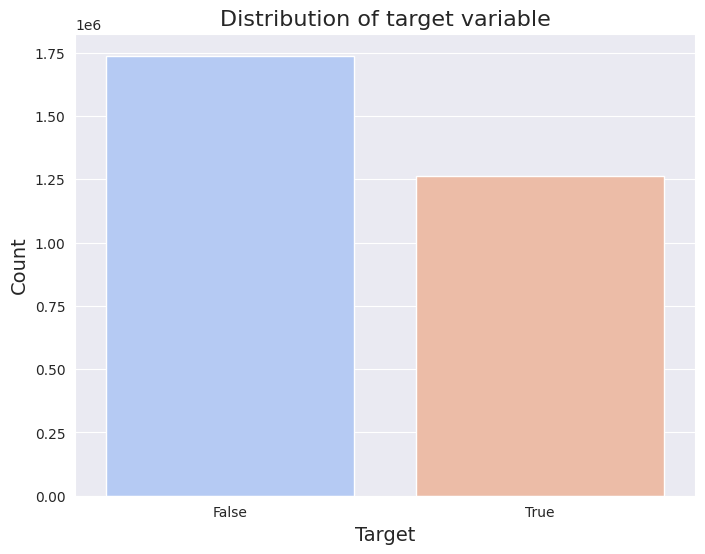

In [12]:
# plotting the target variable
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x=flight_eda_df['target'], ax=ax, palette='coolwarm')
plt.title("Distribution of target variable", fontsize=16)
plt.ylabel("Count", fontsize=14)
plt.xlabel("Target", fontsize=14)

# Saving the plot
plot_path = 'eda_charts/target_distribution_plot.png'
plt.savefig(plot_path)

plt.show()

/tmp/ipykernel_3652/3853364721.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=flight_eda_df, x='airline', palette='viridis', order=sorted_airlines)


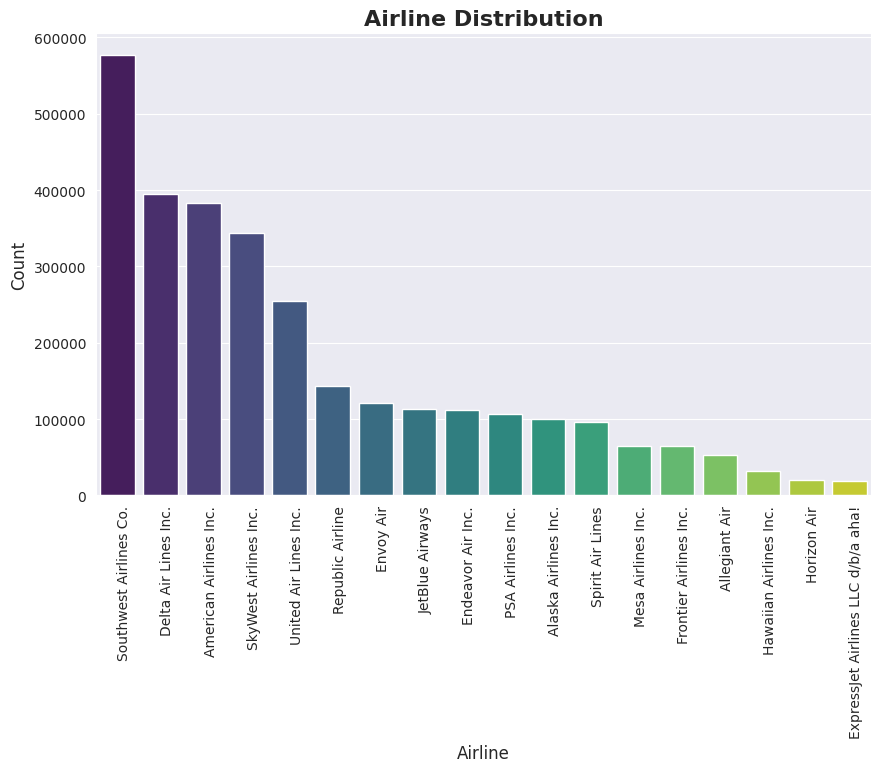

In [13]:
# Sort airlines by count for better visualization
sorted_airlines = flight_eda_df['airline'].value_counts().index

# Create the plot
plt.figure(figsize=(10, 6))
sns.countplot(data=flight_eda_df, x='airline', palette='viridis', order=sorted_airlines)

# Add title and labels
plt.title('Airline Distribution', fontsize=16, fontweight='bold')
plt.ylabel("Count", fontsize=12)
plt.xlabel("Airline", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='left')

# Saving the plot
plot_path = 'eda_charts/airline_distribution_plot.png'
plt.savefig(plot_path)


# Improve overall layout
plt.show()

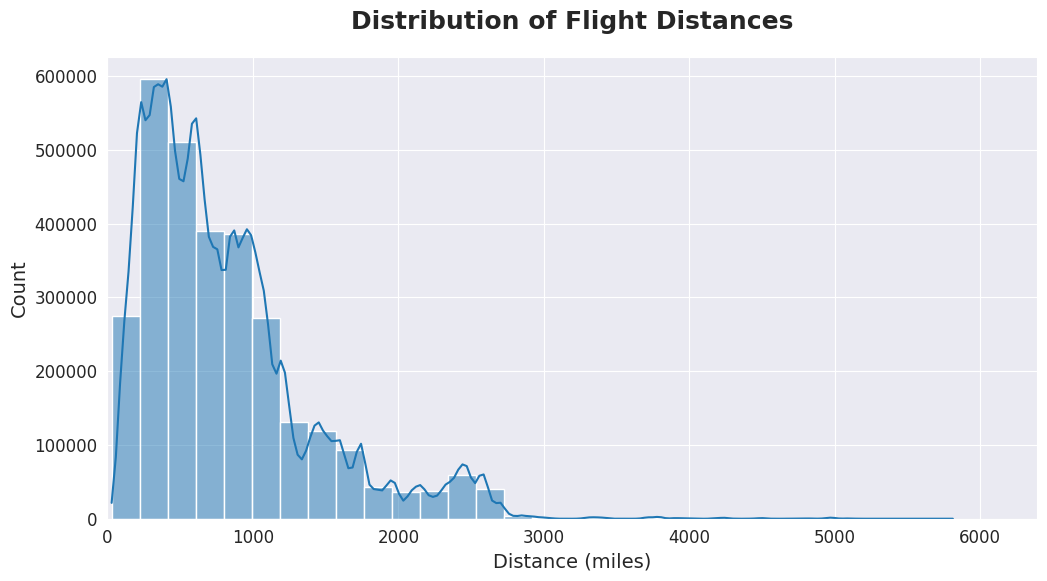

In [14]:
fig, ax = plt.subplots(figsize=(12, 6)) 
sns.histplot(
    data=flight_eda_df, 
    x='distance', 
    bins=30, 
    kde=True, 
    #color='skyblue' 
)

# Add titles and labels
plt.title('Distribution of Flight Distances', fontsize=18, fontweight='bold', pad=20)
plt.ylabel("Count", fontsize=14)
plt.xlabel("Distance (miles)", fontsize=14)

# Customize x-axis limits
plt.xlim(0, flight_eda_df['distance'].max() * 1.1)  
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Saving the plot
plot_path = 'eda_charts/distribution_of_flight_distances_plot.png'
plt.savefig(plot_path)


plt.show()

### 2. Bivariate Data Analysis

/tmp/ipykernel_5531/3656388329.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


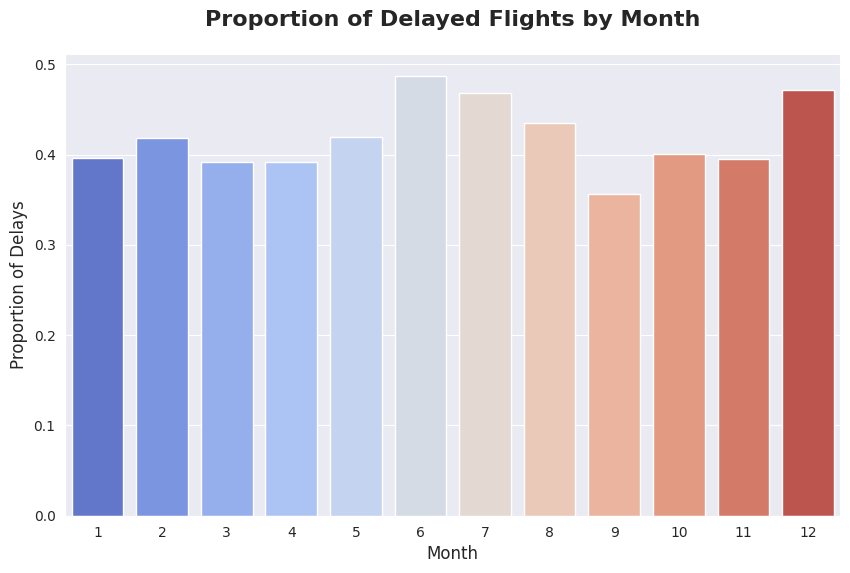

In [15]:
# Calculate the proportion of delayed flights for each month
month_delays = flight_eda_df.groupby('month')['target'].mean() 

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    x=month_delays.index, 
    y=month_delays.values, 
    palette='coolwarm', 
    ax=ax
)

# Add titles and labels
plt.title('Proportion of Delayed Flights by Month', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Proportion of Delays', fontsize=12)
plt.xlabel('Month', fontsize=12)

# Format x-axis for months (1-12)
plt.xticks(ticks=range(0, 12), labels=[f'{i}' for i in range(1, 13)], fontsize=10)

plt.show()


/tmp/ipykernel_5531/143950976.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


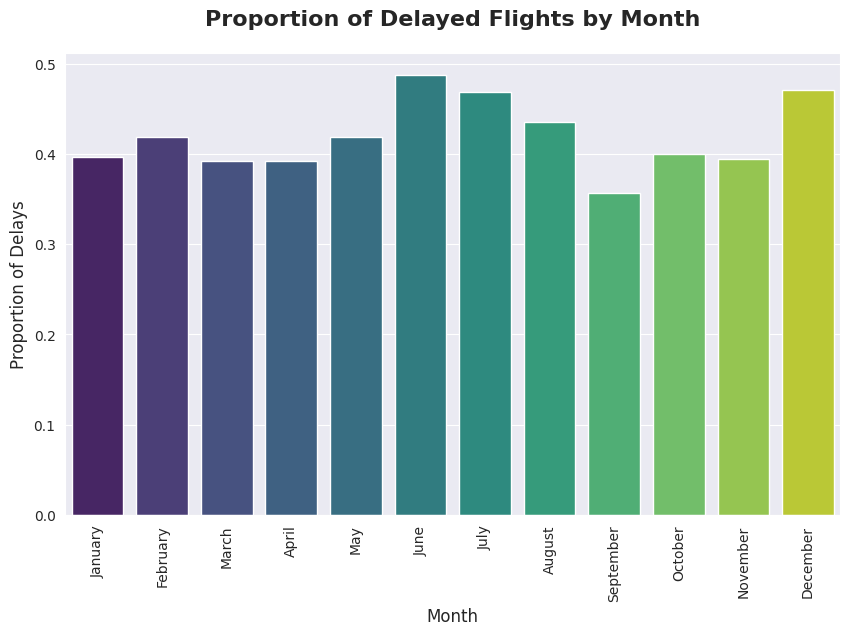

In [16]:
import calendar

# Calculate the proportion of delayed flights for each month
month_delays = flight_eda_df.groupby('month')['target'].mean()  # Assuming `target` is binary (1 = delayed, 0 = not delayed)

# Map numeric months to names
month_names = [calendar.month_name[i] for i in month_delays.index]

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    x=month_names, 
    y=month_delays.values, 
    palette='viridis', 
    ax=ax
)

# Add titles and labels
plt.title('Proportion of Delayed Flights by Month', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Proportion of Delays', fontsize=12)
plt.xlabel('Month', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=10)

plt.show()


/tmp/ipykernel_3652/1239287109.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


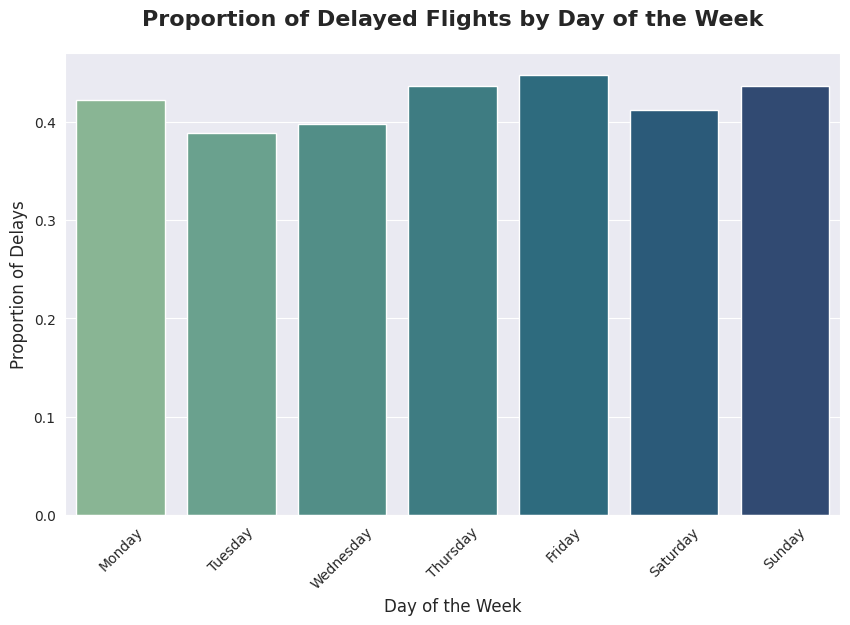

In [15]:
# Calculate the proportion of delayed flights for each day of the week
day_delays = flight_eda_df.groupby('day_of_week')['target'].mean()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    x=day_delays.index, 
    y=day_delays.values, 
    palette='crest', 
    ax=ax
)

# Add titles and labels
plt.title('Proportion of Delayed Flights by Day of the Week', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Proportion of Delays', fontsize=12)
plt.xlabel('Day of the Week', fontsize=12)

# Set x-axis labels
days_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(ticks=range(0, 7), labels=days_labels, rotation=45, fontsize=10)

# Saving the plot
plot_path = 'eda_charts/proportion_of_delays_by_day_of_the_week_plot.png'
plt.savefig(plot_path)


plt.show()


/tmp/ipykernel_3652/1441926524.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  airline_delays = flight_eda_df.groupby('airline')['arr_delay'].mean().sort_values()
/tmp/ipykernel_3652/1441926524.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airline_delays.index, y=airline_delays.values, palette='magma')


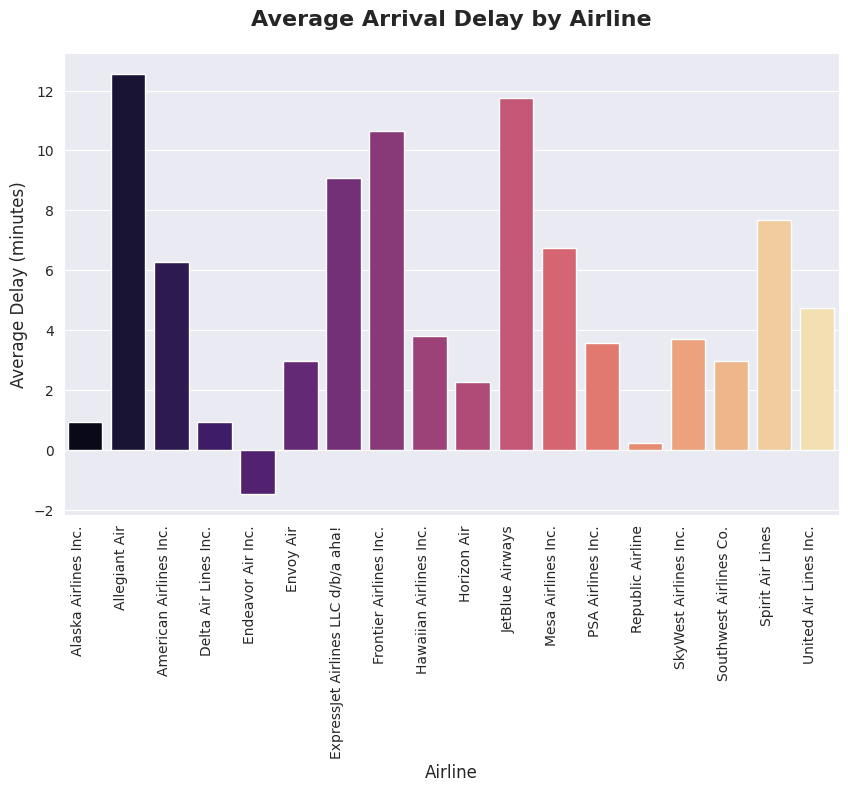

In [16]:
# Calculate average arrival delay by airline
airline_delays = flight_eda_df.groupby('airline')['arr_delay'].mean().sort_values()

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=airline_delays.index, y=airline_delays.values, palette='magma')

# Add title and labels
plt.title('Average Arrival Delay by Airline', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Average Delay (minutes)', fontsize=12)
plt.xlabel('Airline', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=90, ha='right', fontsize=10)

# Saving the plot
plot_path = 'eda_charts/arrival_delay_by_airline1.png'
plt.savefig(plot_path)


plt.show()

/tmp/ipykernel_3652/3159670916.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  airline_delays = flight_eda_df.groupby('airline')['arr_delay'].mean().sort_values()
/tmp/ipykernel_3652/3159670916.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


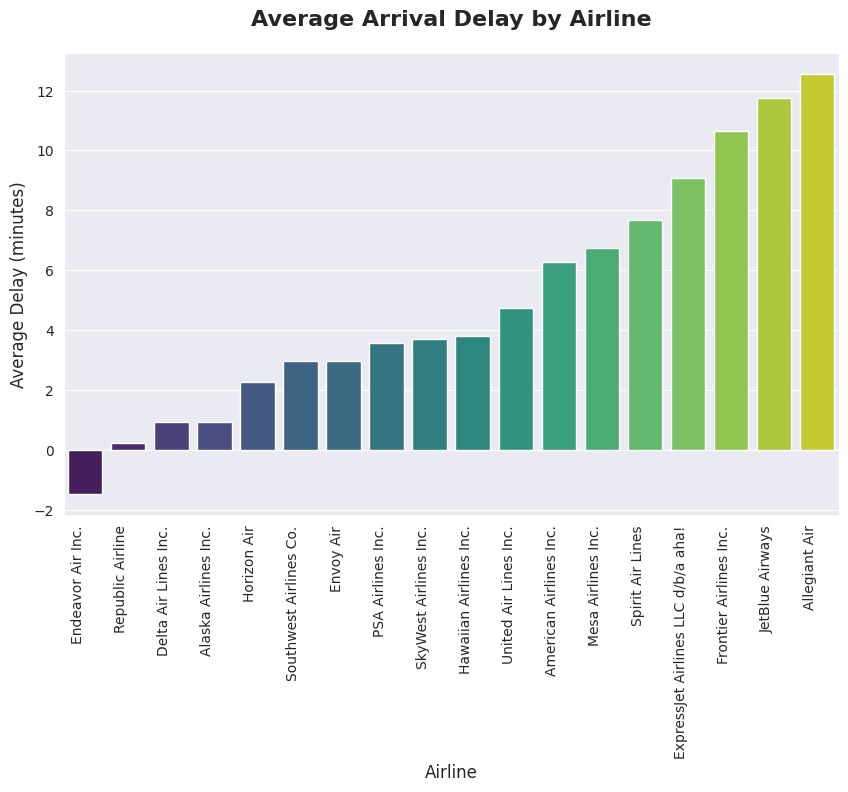

In [17]:
# Calculate average arrival delay by airline
airline_delays = flight_eda_df.groupby('airline')['arr_delay'].mean().sort_values()

# Convert index to categorical and preserve order
airline_order = airline_delays.index

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=airline_delays.index, 
    y=airline_delays.values, 
    palette='viridis', 
    order=airline_order  
)

# Add title and labels
plt.title('Average Arrival Delay by Airline', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Average Delay (minutes)', fontsize=12)
plt.xlabel('Airline', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=90, ha='right', fontsize=10)

# Saving the plot
plot_path = 'eda_charts/arrival_delay_by_airline2.png'
plt.savefig(plot_path)

plt.show()


Which cause contributes most to delays?

/tmp/ipykernel_3652/1423726402.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay_summary.index, y=delay_summary.values, palette='crest')


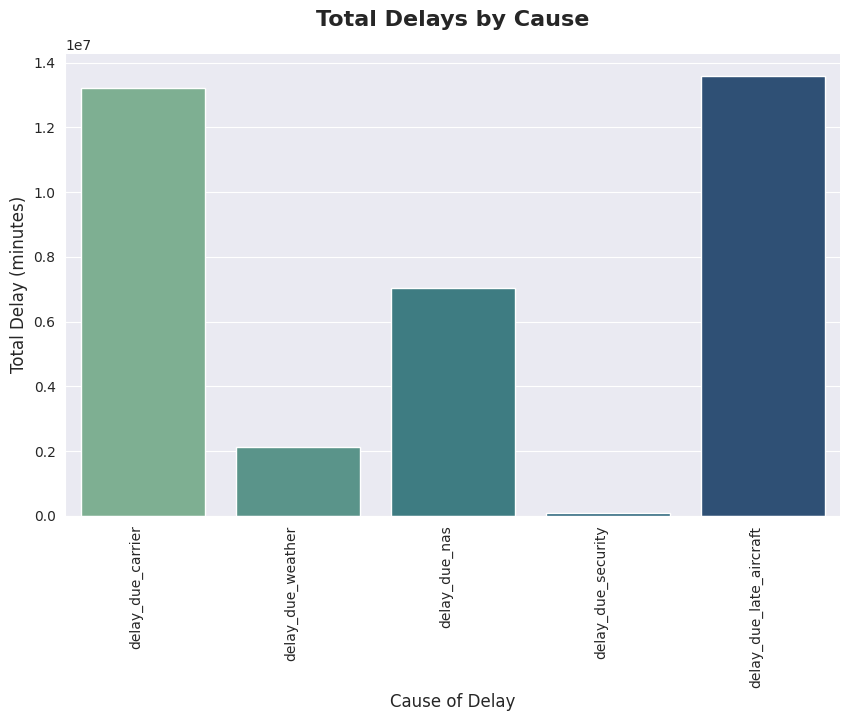

In [18]:
# Summarize delay causes
delay_causes = ['delay_due_carrier', 'delay_due_weather', 'delay_due_nas', 
                'delay_due_security', 'delay_due_late_aircraft']

delay_summary = flight_eda_df[delay_causes].sum()

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=delay_summary.index, y=delay_summary.values, palette='crest')

# Add title and labels
plt.title('Total Delays by Cause', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Total Delay (minutes)', fontsize=12)
plt.xlabel('Cause of Delay', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=90, ha='right', fontsize=10)

# Improve layout
sns.despine()

# Saving the plot
plot_path = 'eda_charts/total_delays_by_cause.png'
plt.savefig(plot_path)

plt.show()

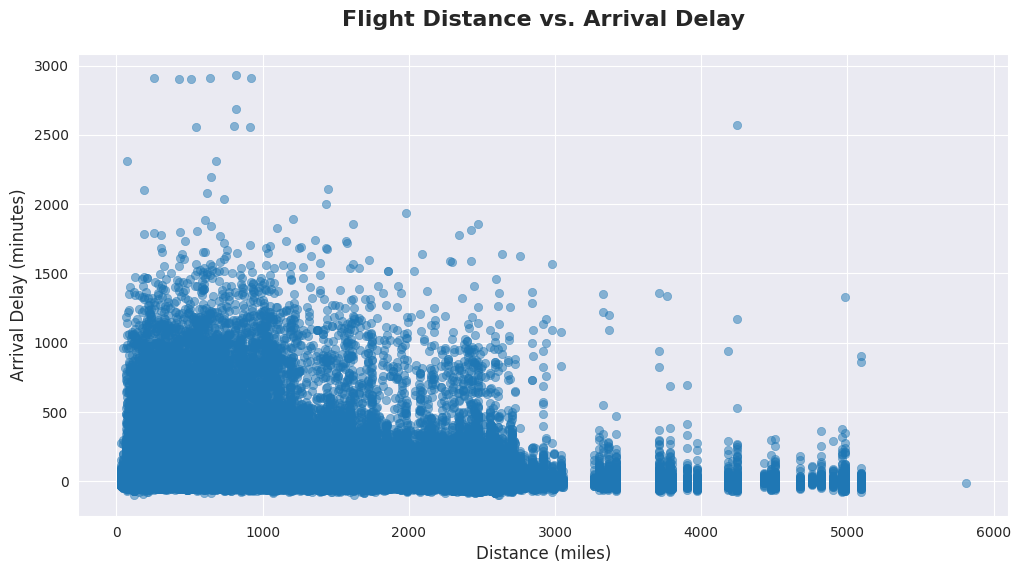

In [19]:
# Scatter plot of flight distance vs. arrival delay
plt.figure(figsize=(12, 6))
sns.scatterplot(x='distance', y='arr_delay', data=flight_eda_df, alpha=0.5, edgecolor=None)
plt.title('Flight Distance vs. Arrival Delay', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Distance (miles)', fontsize=12)
plt.ylabel('Arrival Delay (minutes)', fontsize=12)
plt.grid(True)

# Saving the plot
plot_path = 'eda_charts/flight_distances_vs_arrival_delay.png'
plt.savefig(plot_path)

plt.show()


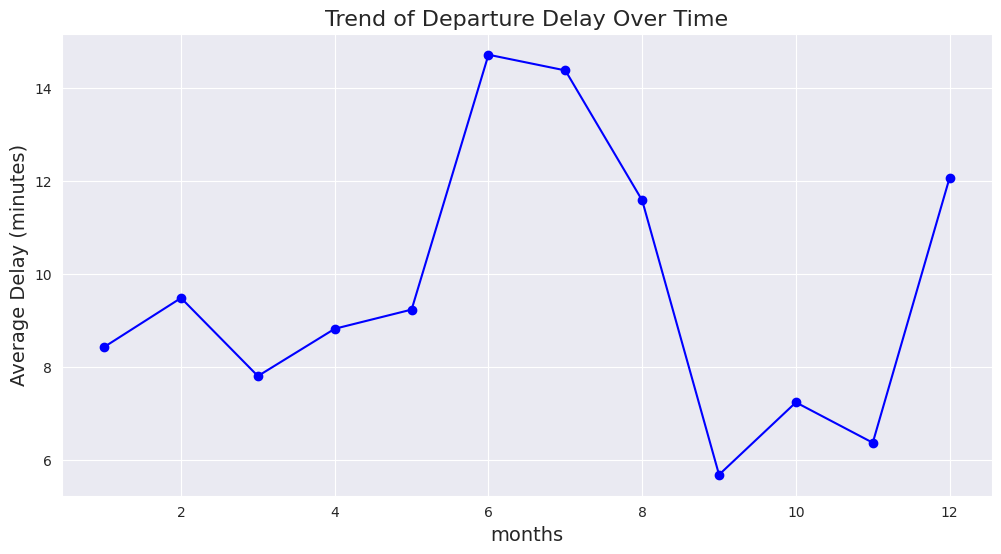

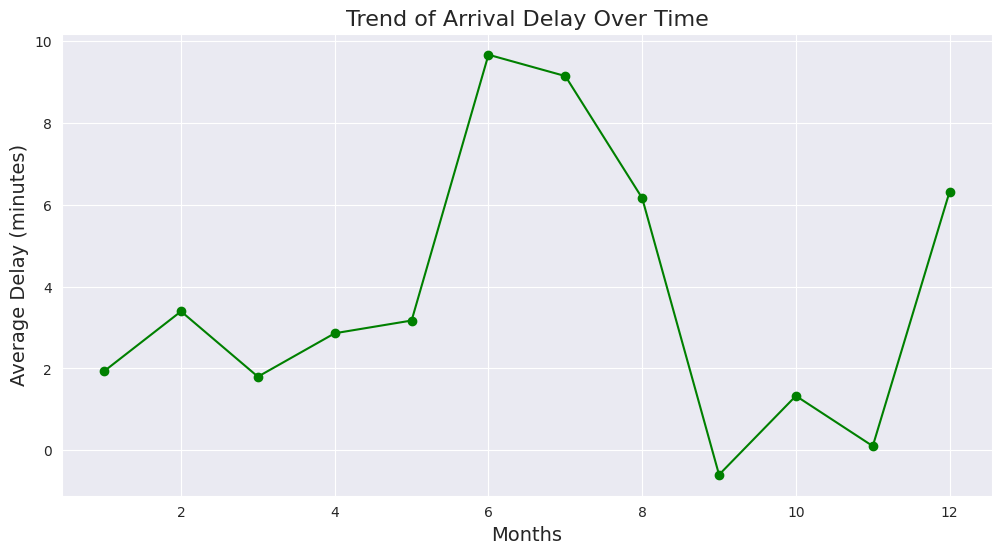

In [21]:
# Plot trends over time for departure delay
fig, ax = plt.subplots(figsize=(12, 6))
flight_eda_df.groupby('month')['dep_delay'].mean().plot(kind='line', ax=ax, marker='o', color='blue')
plt.title('Trend of Departure Delay Over Time', fontsize=16)
plt.ylabel('Average Delay (minutes)', fontsize=14)
plt.xlabel('months', fontsize=14)

# Saving the plot
plot_path = 'eda_charts/trend_of_departure_delay_over_time.png.png'
plt.savefig(plot_path)

plt.show()

# Plot trends over time for arrival delay
fig, ax = plt.subplots(figsize=(12, 6))
flight_eda_df.groupby('month')['arr_delay'].mean().plot(kind='line', ax=ax, marker='o', color='green')
plt.title('Trend of Arrival Delay Over Time', fontsize=16)
plt.ylabel('Average Delay (minutes)', fontsize=14)
plt.xlabel('Months', fontsize=14)

# Saving the plot
plot_path = 'eda_charts/trend_of_arrival_delay_over_time.png'
plt.savefig(plot_path)

plt.show()


/tmp/ipykernel_3652/2483446675.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daywise_delays.index, y=daywise_delays.values, palette='coolwarm')


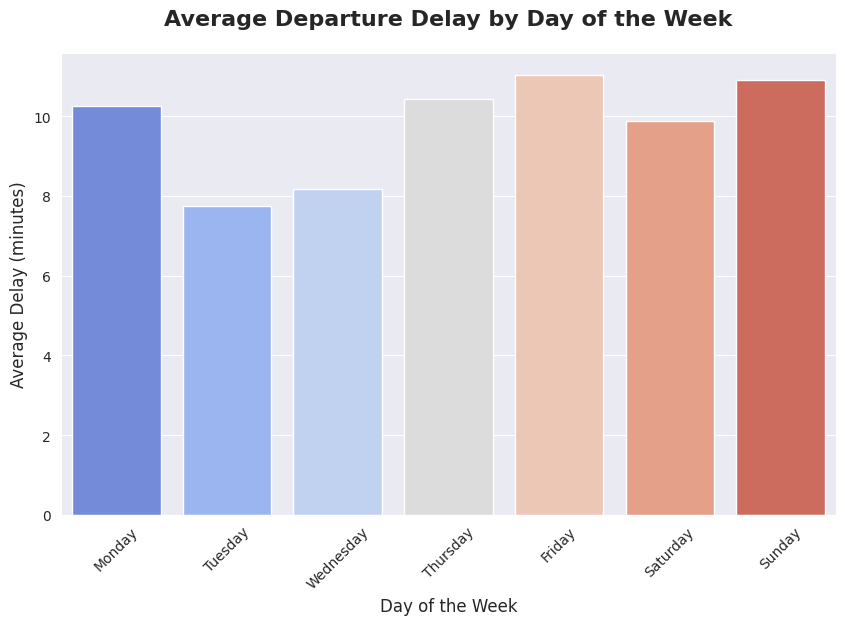

In [22]:
# Distribution of delays by day of the week
daywise_delays = flight_eda_df.groupby('day_of_week')['dep_delay'].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=daywise_delays.index, y=daywise_delays.values, palette='coolwarm')
plt.title('Average Departure Delay by Day of the Week', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Average Delay (minutes)', fontsize=12)
plt.xlabel('Day of the Week', fontsize=12)

# Set x-axis labels (e.g., Monday to Sunday)
days_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(ticks=range(0, 7), labels=days_labels, rotation=45, fontsize=10)

# Saving the plot
plot_path = 'eda_charts/average_depature_delay_by_day_of_week.png'
plt.savefig(plot_path)

plt.show()


### 3. Mulivariate Data Analysis

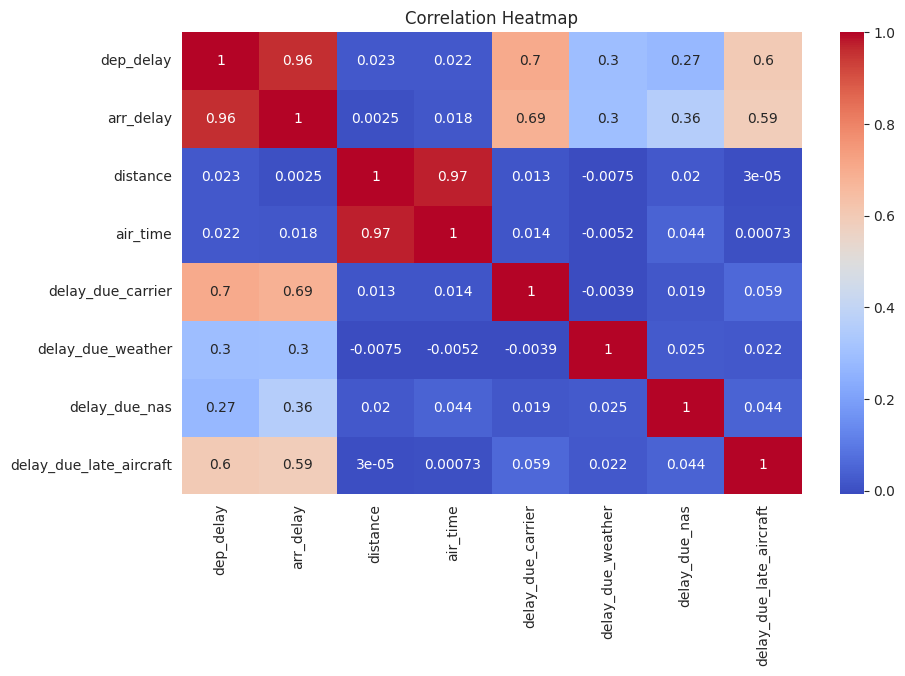

In [23]:
# Correlation heatmap
correlation = flight_eda_df[['dep_delay', 'arr_delay', 'distance', 'air_time',
                  'delay_due_carrier', 'delay_due_weather', 
                  'delay_due_nas', 'delay_due_late_aircraft']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

# Saving the plot
plot_path = 'eda_charts/flight_delay_correlation_heatmap.png'
plt.savefig(plot_path)

plt.show()
